In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("AAPL.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,30.490000,30.642857,30.340000,30.572857,26.538483,123432400
1,2010-01-05,30.657143,30.798571,30.464285,30.625713,26.584366,150476200
2,2010-01-06,30.625713,30.747143,30.107143,30.138571,26.161509,138040000
3,2010-01-07,30.250000,30.285715,29.864286,30.082857,26.113146,119282800
4,2010-01-08,30.042856,30.285715,29.865715,30.282858,26.286753,111902700


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2537,2020-02-03,304.299988,313.489990,302.220001,308.660004,307.929199,43496400
2538,2020-02-04,315.309998,319.640015,313.630005,318.850006,318.095062,34154100
2539,2020-02-05,323.519989,324.760010,318.950012,321.450012,320.688934,29706700
2540,2020-02-06,322.570007,325.220001,320.260010,325.209991,324.440002,26356400
2541,2020-02-07,322.369995,323.399994,318.000000,320.029999,320.029999,29357800


In [9]:
df1=df.reset_index()['Close']
df1.head()

0    30.572857
1    30.625713
2    30.138571
3    30.082857
4    30.282858
Name: Close, dtype: float64

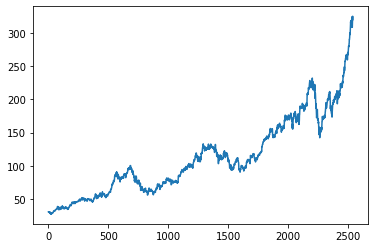

In [13]:
import matplotlib.pyplot as plt
plt.plot(df1,)

In [15]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [16]:
import numpy as np

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
df1

array([[0.0105353 ],
       [0.01071281],
       [0.00907686],
       ...,
       [0.98737306],
       [1.        ],
       [0.9826043 ]])

In [20]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [25]:
training_size
#test_size

1779

In [21]:
train_data

array([[0.0105353 ],
       [0.01071281],
       [0.00907686],
       ...,
       [0.31075312],
       [0.31716736],
       [0.31736888]])

In [28]:
import numpy

In [29]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [30]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [31]:
print(X_train.shape), print(y_train.shape)

(1678, 100)
(1678,)


(None, None)

In [32]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [33]:

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [34]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [35]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Train on 1678 samples, validate on 662 samples
Epoch 1/50
1678/1678 [==============================] - 21s 13ms/sample - loss: 0.0061 - val_loss: 0.0145
Epoch 2/50
1678/1678 [==============================] - 9s 5ms/sample - loss: 3.8289e-04 - val_loss: 0.0014
Epoch 3/50
1678/1678 [==============================] - 9s 6ms/sample - loss: 1.6750e-04 - val_loss: 0.0023
Epoch 4/50
1678/1678 [==============================] - 9s 5ms/sample - loss: 1.6312e-04 - val_loss: 0.0023
Epoch 5/50
1678/1678 [==============================] - 9s 5ms/sample - loss: 1.6128e-04 - val_loss: 0.0017
Epoch 6/50
1678/1678 [==============================] - 9s 5ms/sample - loss: 1.6306e-04 - val_loss: 0.0022
Epoch 7/50
1678/1678 [==============================] - 9s 5ms/sample - loss: 1.5227e-04 - val_loss: 0.0023
Epoch 8/50
1678/1678 [==============================] - 9s 5ms/sample - loss: 1.5306e-04 - val_loss: 0.0032
Epoch 9/50
1678/1678 [==============================] - 9s 5ms/sample - loss: 1.5182e-04 - 

In [37]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [38]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [39]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

86.93419501881682

In [40]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

192.82413512773053

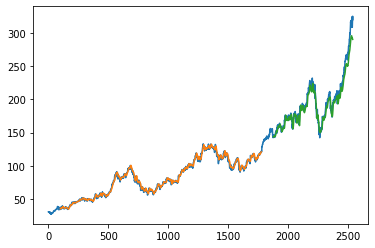

In [41]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:

day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)